# Devices in `vipdopt`

The `Device` class is how optical devices are represented in `vipdopt`. A `Device` object contains a 3D voxel-grid design region, with each voxel having its own refractive index, along with a number of helpful methods for interacting with the rest of the code library.


For later cells to work, please run the following block first.

TODO:
* Filters
* initialization parameters
* binarization
* exporting design
* importing into simulation

In [9]:
# imports
from pathlib import Path
import sys  

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=100)

# Get vipdopt directory path from Notebook
parent_dir = str(Path().resolve().parents[1])

# Add to sys.path
sys.path.insert(0, parent_dir)

# Imports from vipdopt
from vipdopt.optimization import Device
from vipdopt.utils import Coordinates


## Creating a `Device`

A `Device` requires a number of parameters to be created:
* The size of the 3D-grid in voxels, given as a 3-tuple of integers
* A Minimum and maximum permittivity
* The coordinates of device in 3D space
    * This utilizes the `Coordinates` class


Text(0.5, 1.0, 'Initial Design Variable')

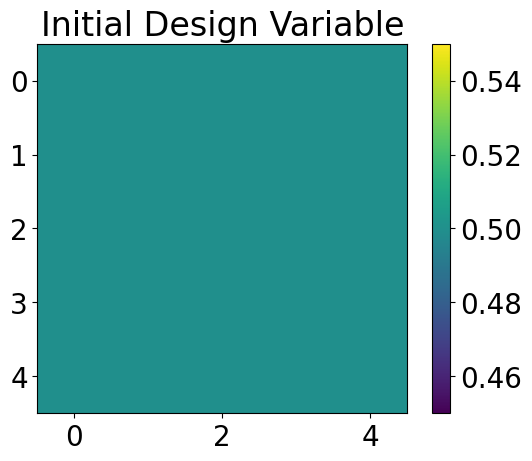

In [21]:
device_size = (5, 5, 5)  # use a 5x5x5 grid for the design region
permittivity_bounds = (0, 1)

# Center the device at the origin with a voxel size of 1
coords = {
    'x': np.linspace(-2.5, 2.5, 5),
    'y': np.linspace(-2.5, 2.5, 5),
    'z': np.linspace(-2.5, 2.5, 5),
}

dev = Device(
    device_size,
    permittivity_bounds,
    coords
)

# By default the device will have density 0.5 everywhere
# Plot the design variable (the slice at z=0)
im = plt.imshow(dev.get_design_variable().real[..., 0])
plt.colorbar(im)
plt.title('Initial Design Variable')

## Optional Parameters
There are a number of optional parameters when creating a `Device`:
* The name of the device (defaults to "device") 
* A list of `Filters`
* Initialization parameters that are further described in the following section

### Initialization Options

When creating a new device, there are a number of settings that can be tweaked to
change the intital permittivity values it will be populated with

### Initial Density

The initial density of the device is the parameter we are optimizing (frequently 
referred to as the "design variable"). It is then passed through `Filters` (possibly 
non-linearly) and then scaled to the permittivity contraints.

The `init_density` can be specified, or it defaults to 0.5. If `randomize` is `False`,
the entire design varibale will be set uniformly to the initial density.

### Randomization

If `randomize` is set to `True`, then the values will be drawn from a normal
distribution centered at `init_density`, with scale 0.27.

A random seed can be specified by providing an integer. By default, the random seed is 
`None` which effectivley makes the seed random as well.

### Symmetry

If `symmetric` is set to `True` the design variable will be symmetric over the line $y=x$.

### Miscellaneous Parameters

Additional paramerters can be passed into the `Device` using `kwargs`. These values won't
be used for any internal functionality in the `Device` but can be accessed as attributes
if desired.


Text(0.5, 1.0, 'Randomized Design Variable')

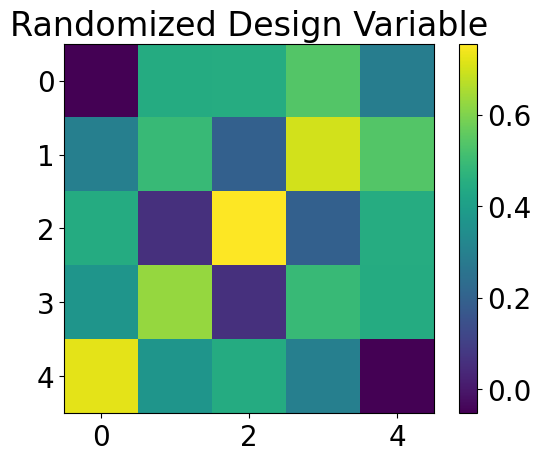

In [22]:
# Make the device randomized an symmetric this time
dev = Device(
    device_size,
    permittivity_bounds,
    coords,
    randomize=True,
    symmetric=True
)

# Plot the design variable (the slice at z=0)
im = plt.imshow(dev.get_design_variable().real[..., 0])  # Plot first layer 
plt.colorbar(im)
plt.title('Randomized Design Variable')